<a href="https://colab.research.google.com/github/wepeng07/ML/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


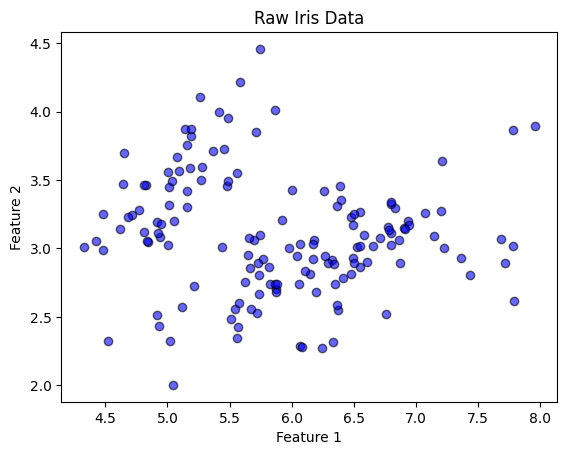

In [14]:
iris_data = np.genfromtxt("data/iris.txt", usecols=(0,1))
plt.scatter(iris_data[:, 0], iris_data[:, 1], c='blue', alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Raw Iris Data")
plt.show()

i think there are three clusters exist in the image

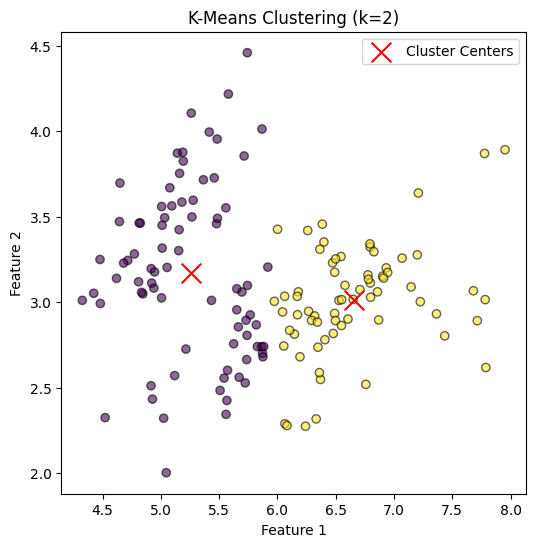

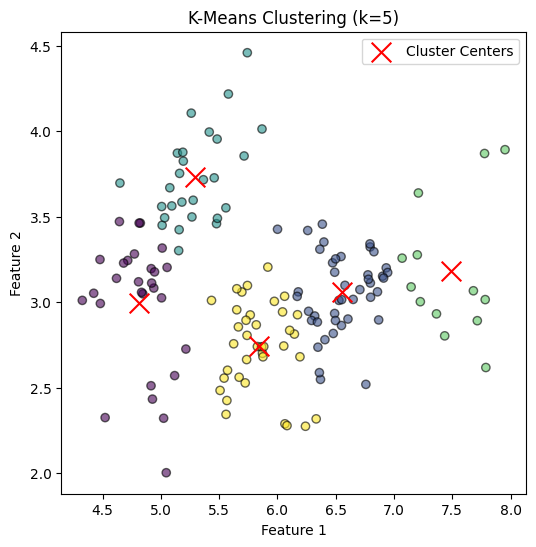

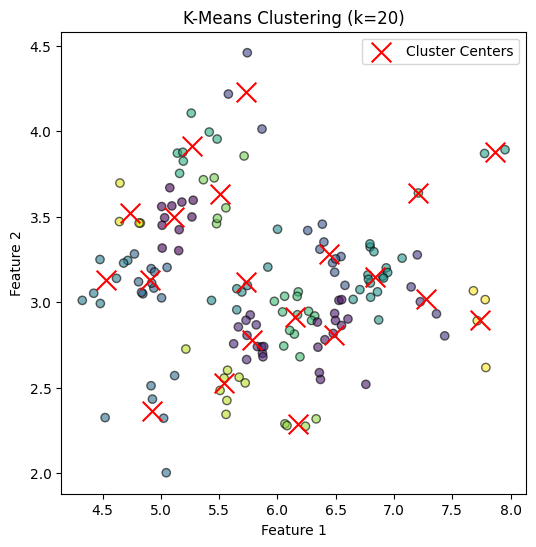

In [16]:
k_values = [2, 5, 20]
num_initializations = 5
best_kmeans_results = {}

for k in k_values:
    best_inertia = float('inf')
    best_labels = None
    best_centers = None

    for _ in range(num_initializations):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=None)
        labels = kmeans.fit_predict(iris_data)
        inertia = kmeans.inertia_

        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = labels
            best_centers = kmeans.cluster_centers_

    best_kmeans_results[k] = (best_labels, best_centers)

for k, (labels, centers) in best_kmeans_results.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(iris_data[:, 0], iris_data[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label="Cluster Centers")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"K-Means Clustering (k={k})")
    plt.legend()
    plt.show()


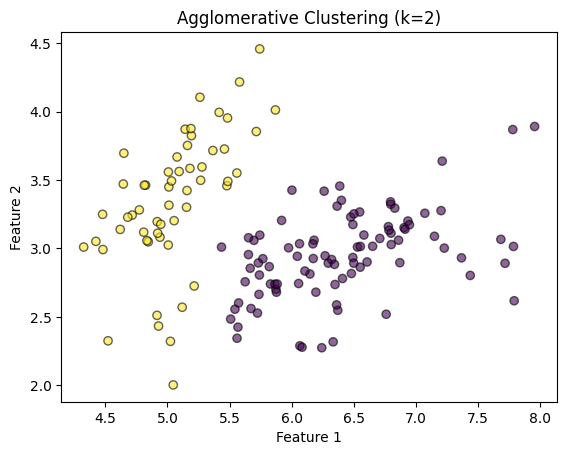

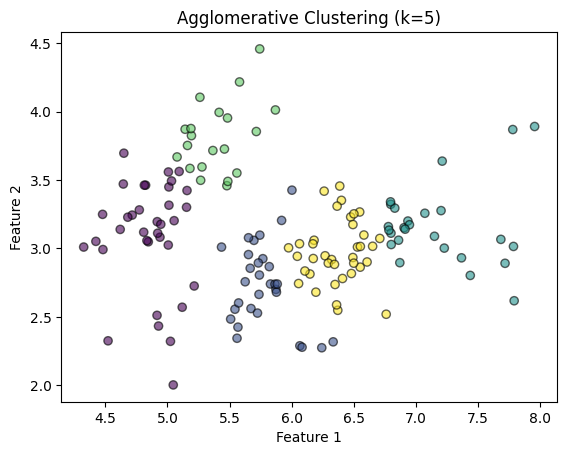

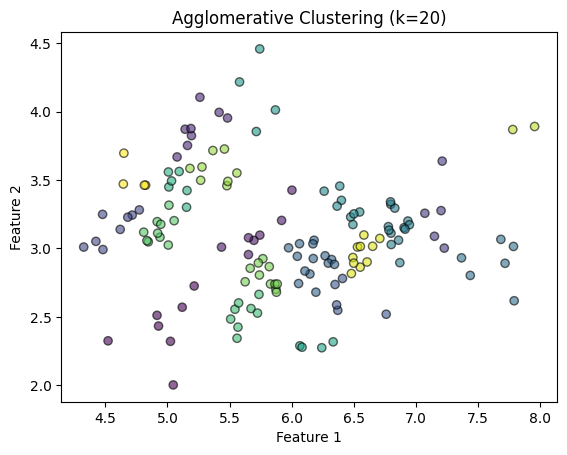

In [18]:
for k in k_values:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(iris_data)

    # Plot results
    plt.scatter(iris_data[:, 0], iris_data[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Agglomerative Clustering (k={k})")
    plt.show()

Similarities:1.to divide data into different groups and uncover the hidden grouping structure in the data

difference:
K-Means: Assigns points based on distance from cluster centers.
Agglomerative Clustering: Starts with each data point as a separate cluster and continute to merges small clusters by distance.

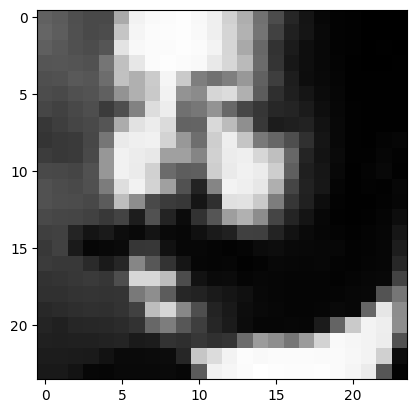

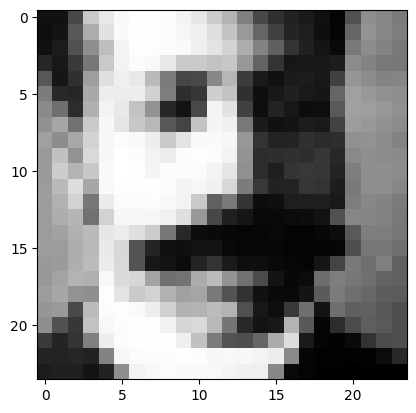

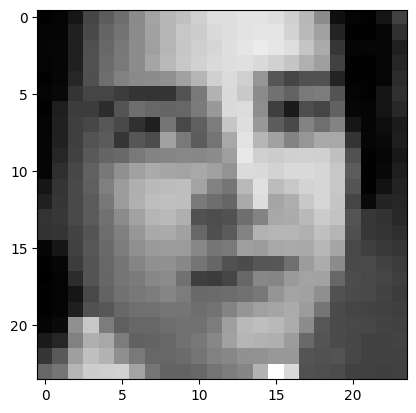

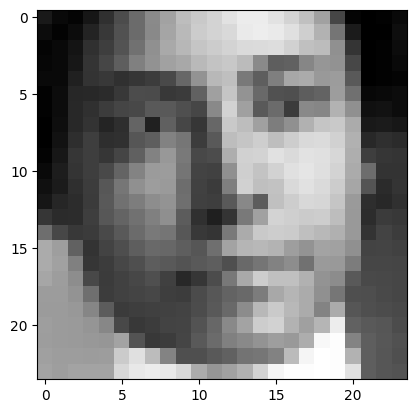

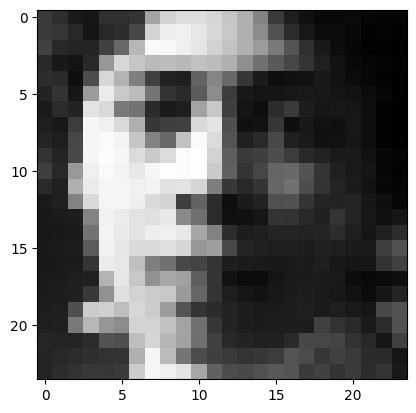

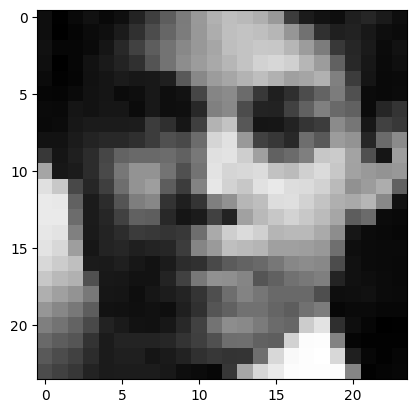

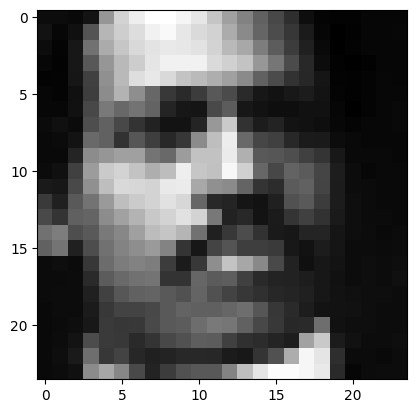

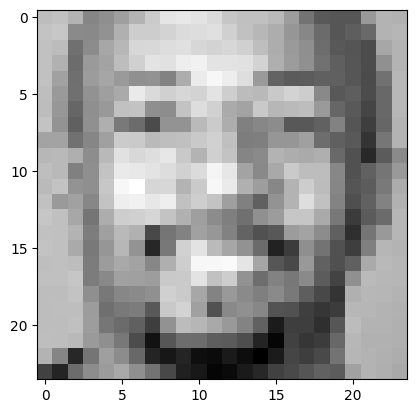

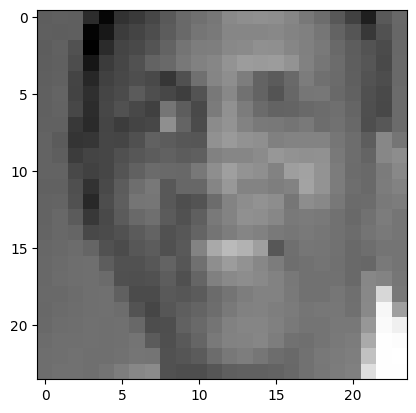

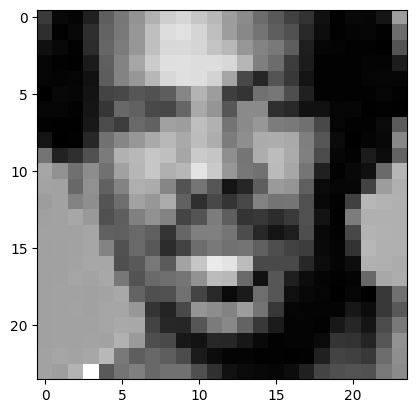

In [21]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
for i in range(10):
  img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches
  plt.imshow( img.T , cmap="gray")
  plt.show()

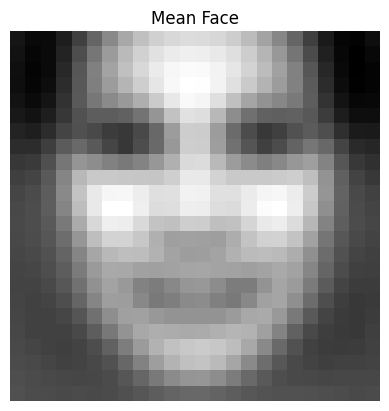

In [23]:
from scipy.linalg import svd

# Compute mean face
mean_face = np.mean(X, axis=0)

# Zero-center the data
X0 = X - mean_face

# Display mean face
plt.imshow(np.reshape(mean_face, (24, 24)).T, cmap="gray")
plt.title("Mean Face")
plt.axis("off")
plt.show()

In [24]:


U, S, Vh = svd(X0, full_matrices=False)

W = U @ np.diag(S)

print("Shape of W:", W.shape)  # (num_samples, 576)
print("Shape of Vh:", Vh.shape)  # (576, 576)


Shape of W: (4916, 576)
Shape of Vh: (576, 576)


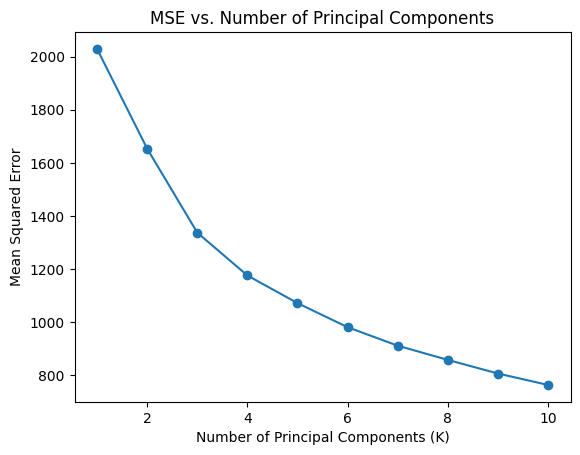

In [25]:
mse_values = []
K_values = range(1, 11)

for K in K_values:
    X0_approx = W[:, :K] @ Vh[:K, :]
    mse = np.mean((X0 - X0_approx) ** 2)
    mse_values.append(mse)

# Plot MSE vs. K
plt.plot(K_values, mse_values, marker='o')
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Number of Principal Components")
plt.show()


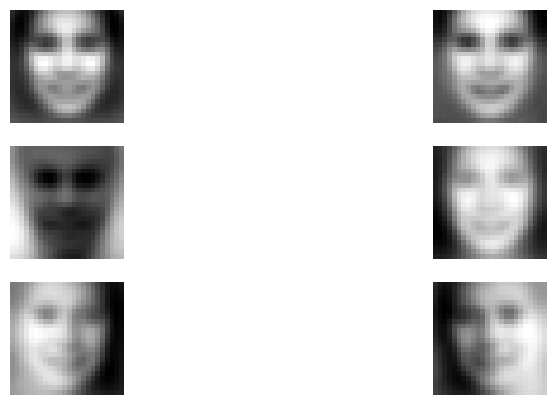

In [26]:
alpha = 2 * np.median(np.abs(W[:, 0]))
plt.figure(figsize=(10, 5))
for j in range(3):
    for i, sign in enumerate([1, -1]):
        img = mean_face + sign * alpha * Vh[j, :]
        img = np.reshape(img, (24, 24))
        plt.subplot(3, 2, j * 2 + i + 1)
        plt.imshow(img.T, cmap="gray")
        plt.axis("off")
plt.show()


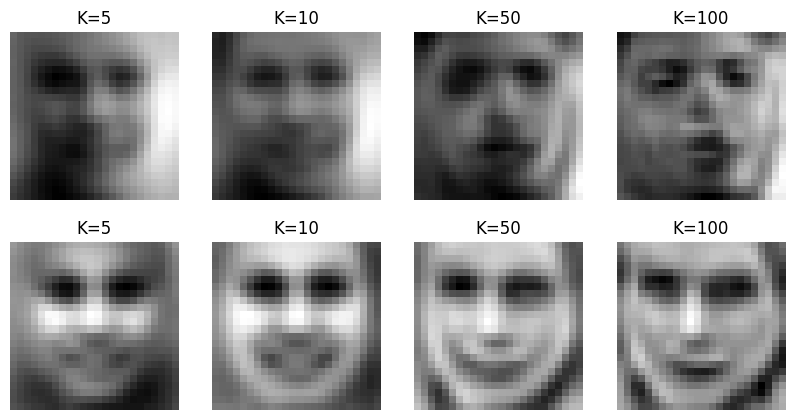

In [27]:
chosen_faces = np.random.choice(X.shape[0], 2, replace=False)

K_values = [5, 10, 50, 100]
plt.figure(figsize=(10, 5))

for i, face_idx in enumerate(chosen_faces):
    original_face = X[face_idx, :]

    for j, K in enumerate(K_values):
        reconstructed_face = W[face_idx, :K] @ Vh[:K, :]
        reconstructed_face += mean_face  # Add mean back

        plt.subplot(2, len(K_values), i * len(K_values) + j + 1)
        plt.imshow(np.reshape(reconstructed_face, (24, 24)).T, cmap="gray")
        plt.axis("off")
        plt.title(f"K={K}")

plt.show()


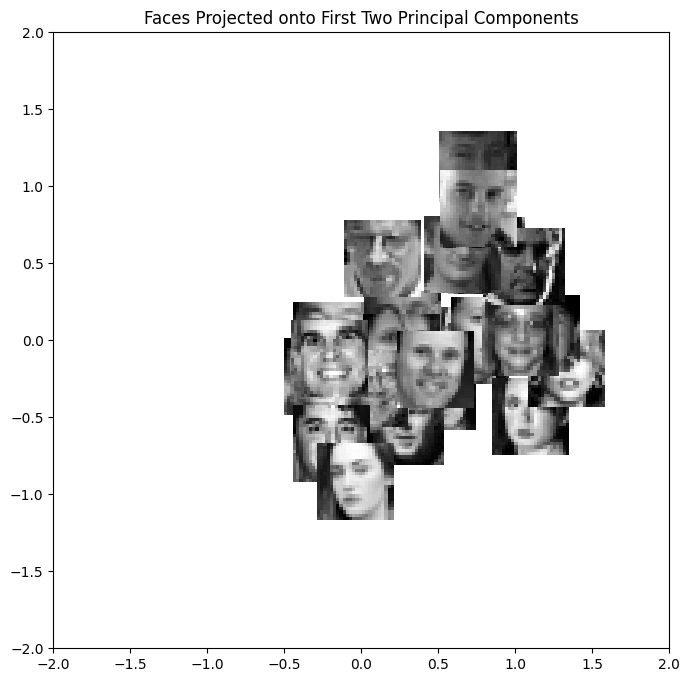

In [28]:
import random
from sklearn.preprocessing import MinMaxScaler

# Pick 25 random face indices
idx = random.sample(range(X.shape[0]), 25)

# Normalize W[:, 0:2] for visualization
scaler = MinMaxScaler(feature_range=(-2, 2))
coord = scaler.fit_transform(W[:, :2])

plt.figure(figsize=(8, 8))
for i in idx:
    loc = (coord[i, 0], coord[i, 0] + 0.5, coord[i, 1], coord[i, 1] + 0.5)
    img = np.reshape(X[i, :], (24, 24))
    plt.imshow(img.T, cmap="gray", extent=loc)

plt.axis((-2, 2, -2, 2))
plt.title("Faces Projected onto First Two Principal Components")
plt.show()
